In [9]:
import numpy as np
from scipy.io import loadmat
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy.signal import *
from math import sqrt

In [10]:
sintesis = loadmat('sintesis.mat')
sintesis

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Sep 09 12:18:20 2020',
 '__version__': '1.0',
 '__globals__': [],
 'coef': array([[ 1.        , -0.40321523, -0.10422101, ...,  0.00110615,
         -0.13328689,  0.09413874],
        [ 1.        , -0.40364892,  0.00571017, ..., -0.11009042,
         -0.23399183,  0.15338591],
        [ 1.        , -0.30258198, -0.04449645, ..., -0.11747033,
         -0.13732837,  0.12694894],
        ...,
        [ 1.        , -0.48897606, -0.2780322 , ...,  0.02094446,
         -0.14134451,  0.17131546],
        [ 1.        , -0.51040743, -0.16454425, ...,  0.03291948,
          0.07583863, -0.03061901],
        [ 1.        , -0.37012351, -0.29168727, ...,  0.03491205,
          0.05917975,  0.00574997]]),
 'excit': array([[ 0.23452913, -1.21976728,  0.07965829, ..., -2.13809009,
         -1.20137136, -0.84286915],
        [-1.36262477,  0.74873396,  0.47875199, ...,  0.46577369,
          0.09968263,  0.58093255],
        [ 0.0

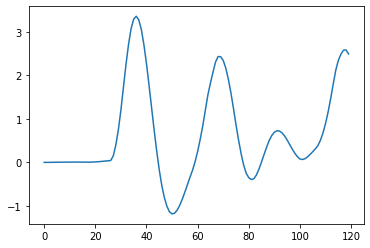

In [11]:
a, b = sintesis['coef'], sintesis['ganancia'][0]
x = np.zeros(120)
x[0] = 1

# 120 muestras, 15ms todas las muestras.
plt.plot(lfilter(b, a[100], x))

([<matplotlib.lines.Line2D at 0x7ff8e5fd9390>],
 array([ 6.70209597e-05, -2.56102369e-04, -3.40284746e-04, ...,
         1.02909911e+01,  1.02186014e+01,  1.05476371e+01]))

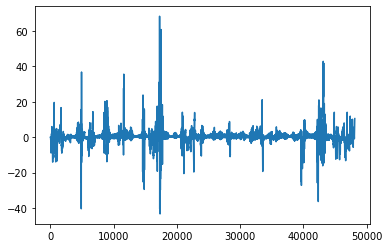

In [37]:
#c
y = []
x = sintesis['excit']
a = sintesis['coef']
b = sintesis['ganancia'][0]
longitud = len(a)
for i in range(longitud):
    y = np.concatenate((y, lfilter(b, a[i], x[i])), axis=None)
plt.plot(y), y

putos amos


([<matplotlib.lines.Line2D at 0x7ff8e662a190>],
 array([ 3.73412128e-07, -1.42689289e-06, -1.89592110e-06, ...,
         1.25082372e-01,  1.20883997e-01,  1.19780886e-01]))

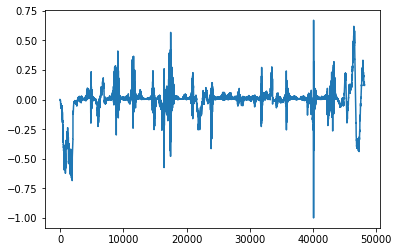

In [41]:
#e
y = []
x = sintesis['excit']
a = sintesis['coef']
b = sintesis['ganancia'][0]
longitud = len(a)
for i in range(longitud):
    if i == 0:
        zi = lfiltic(b, a[i], y)
    filtro, zi = lfilter(b, a[i], x[i], zi=zi)
    y = np.concatenate((y, filtro), axis=None)
for i in y:
    if i == 0:
        print('subnormal')
print('putos amos')
y_max = max(abs(y))
y /= y_max
scipy.io.wavfile.write('vocoder2.wav', 8000, y)
plt.plot(y), y